# SG13G2 gm/Id Sizing Script Template

**Copyright 2025 Michael Koefinger**

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at
http://www.apache.org/licenses/LICENSE-2.0



In [1]:
from pygmid import Lookup as lk
import numpy as np
import matplotlib.pyplot as plt
# LUTs can be found at https://github.com/iic-jku/analog-circuit-design/tree/main/sizing
table_dir = "../../analog-circuit-design/sizing/"
lv_nmos = lk(table_dir + "sg13_lv_nmos.mat")
lv_pmos = lk(table_dir + "sg13_lv_pmos.mat")

### Define Specs

In [2]:
VDD = 1.5
Iref = 10e-9
Wref = 10
Lref = 5
JDref = Iref/Wref

### Find VGSref of Diode-Connected MOS

In [3]:
# Get Vgs of reference PMOS
vds = 0.4 # guess vds
for i in range(2):
    VGSref = lv_pmos.lookupVGS(ID_W = JDref, VDS=vds, VSB= 0, L=Lref)
    vds = VGSref
print('VGSref =',np.array(VGSref).round(3), 'V')
# Calc reference resistor for given current
Rref = VGSref/Iref
print('Rref =',np.array(Rref*1e-6).round(2),'MOhm')

VGSref = 0.243 V
Rref = 24.34 MOhm


### Size NMOS Current mirror with simple cascode

In [4]:
# Determine voltage of cascoded NMOS current mirror (2 stacked diodes)
# Check 
Ln = np.array([1,5,10])
gmIDn0 = np.arange(3,32,1)
JDn0 = lv_nmos.lookup('ID_W', GM_ID=gmIDn0, VSB=0, VDS=0.14, L=Ln)
Wn0 = Iref/JDn0

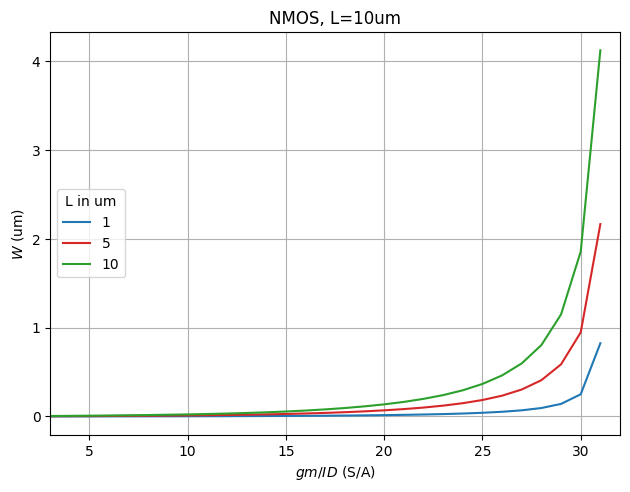

In [5]:
fig, ax1 = plt.subplots()
ax1.grid(axis='both')
ax1.set_xlabel('$gm/ID$ (S/A)')
ax1.set_ylabel('$W$ (um)')
ax1.plot(gmIDn0, Wn0[0,], color='tab:blue')
ax1.plot(gmIDn0, Wn0[1,], color='tab:red')
ax1.plot(gmIDn0, Wn0[2,], color='tab:green')
ax1.tick_params(axis='y')
ax1.legend(loc='center left', title='L in um', labels=Ln)
fig.tight_layout()
plt.title('NMOS, L=10um')
plt.xlim(3, 32)
plt.show()

In [6]:
Ln=10
Wn0 = Wn0[2,]
Wn0_sel = 1
gmIDn0_sel = np.interp(Wn0_sel, Wn0, gmIDn0)
VDSn0 = 0.14 # guess vds
JDn0_sel = lv_nmos.lookup('ID_W', GM_ID=gmIDn0_sel, VSB=0, L=Ln)
for i in range(2):
    VGSn0 = lv_nmos.lookupVGS(ID_W = JDn0_sel, VDS=VDSn0, VSB=0, L=Ln)
    VDSn0 = VGSn0
print('VGSn0 =', np.array(VGSn0).round(3),'V')
print('gmIDn0 =', np.array(gmIDn0_sel).round(1), 'S/A')

VGSn0 = 0.147 V
gmIDn0 = 28.6 S/A
